<a href="https://colab.research.google.com/github/mittaaasishkumar/Classification_ML/blob/main/Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("skincancer.csv")
data.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,PAT_684_1302_588.png,True


In [ ]:
#df_combined = pd.concat([df1,data], ignore_index=True)
#df_combined.head()

In [ ]:
#import io
#import base64

# Create a BytesIO object to hold the DataFrame in CSV format
#csv_buffer = io.BytesIO()
#df_combined.to_csv(csv_buffer, index=False)  # Export to CSV without index

# Encode the CSV data in base64
#encoded_data = base64.b64encode(csv_buffer.getvalue()).decode('utf-8')

# Generate the download link (replace 'your_filename.csv' with your desired name)
#download_link = f'<a href="data:application/csv;base64,{encoded_data}" download="data1.csv">Download CSV</a>'

# Display the download link in your Jupyter Notebook cell using HTML
#from IPython.display import HTML
#display(HTML(download_link))


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

In [ ]:
data.columns

Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed'],
      dtype='object')

In [ ]:
len(data)

2298

## Data Understanding

In [ ]:
data['patient_id'].nunique()

1373

In [ ]:
data['lesion_id'].nunique()

1641

In [ ]:
data['lesion_id'].unique()

array([1765,  881, 1867, ...,  934, 3156, 3189], dtype=int64)

In [ ]:
data['smoke'].unique()

array([nan, False, True], dtype=object)

In [ ]:
data['smoke'].value_counts()

False    1292
True      202
Name: smoke, dtype: int64

In [ ]:
data['drink'].unique()

array([nan, False, True], dtype=object)

In [ ]:
data['drink'].value_counts()

False    1126
True      368
Name: drink, dtype: int64

In [ ]:
data['region'].unique()

array(['ARM', 'NECK', 'FACE', 'HAND', 'FOREARM', 'CHEST', 'NOSE', 'THIGH',
       'SCALP', 'EAR', 'BACK', 'FOOT', 'ABDOMEN', 'LIP'], dtype=object)

In [ ]:
data['region'].value_counts()

FACE       570
FOREARM    392
CHEST      280
BACK       248
ARM        192
NOSE       158
HAND       126
NECK        93
THIGH       73
EAR         73
ABDOMEN     36
LIP         23
SCALP       18
FOOT        16
Name: region, dtype: int64

In [ ]:
data['diagnostic'].unique()

array(['NEV', 'BCC', 'ACK', 'SEK', 'SCC', 'MEL'], dtype=object)

In [ ]:
data['diagnostic'].value_counts()

BCC    845
ACK    730
NEV    244
SEK    235
SCC    192
MEL     52
Name: diagnostic, dtype: int64

In [ ]:
data['itch'].unique()

array(['FALSE', 'TRUE', 'UNK'], dtype=object)

In [ ]:
data['itch'].value_counts()

TRUE     1455
FALSE     837
UNK         6
Name: itch, dtype: int64

In [ ]:
data['grew'].unique()

array(['FALSE', 'TRUE', 'UNK'], dtype=object)

In [ ]:
data['grew'].value_counts()

FALSE    971
TRUE     925
UNK      402
Name: grew, dtype: int64

In [ ]:
data['hurt'].unique()

array(['FALSE', 'TRUE', 'UNK'], dtype=object)

In [ ]:
data['hurt'].value_counts()

FALSE    1891
TRUE      397
UNK        10
Name: hurt, dtype: int64

In [ ]:
data['changed'].unique()

array(['FALSE', 'TRUE', 'UNK'], dtype=object)

In [ ]:
data['changed'].value_counts()

FALSE    1700
UNK       396
TRUE      202
Name: changed, dtype: int64

In [ ]:
data['bleed'].unique()

array(['FALSE', 'TRUE', 'UNK'], dtype=object)

In [ ]:
data['bleed'].value_counts()

FALSE    1678
TRUE      614
UNK         6
Name: bleed, dtype: int64

In [ ]:
data['elevation'].unique()

array(['FALSE', 'TRUE', 'UNK'], dtype=object)

In [ ]:
data['elevation'].value_counts()

TRUE     1433
FALSE     863
UNK         2
Name: elevation, dtype: int64

In [ ]:
continuous=['lesion_id','age']

discrete_cat=['region','diagnostic','itch','grew','hurt','changed',
              'bleed','elevation']

## EDA

In [ ]:
data[continuous].describe()

,lesion_id,age
count,2298.000000,2298.000000
mean,1529.933856,60.464752
std,1196.285644,15.894866
min,6.000000,6.000000
25%,720.500000,52.000000
50%,1297.000000,62.000000
75%,1782.750000,72.000000
max,4820.000000,94.000000


<Axes: xlabel='lesion_id', ylabel='Count'>

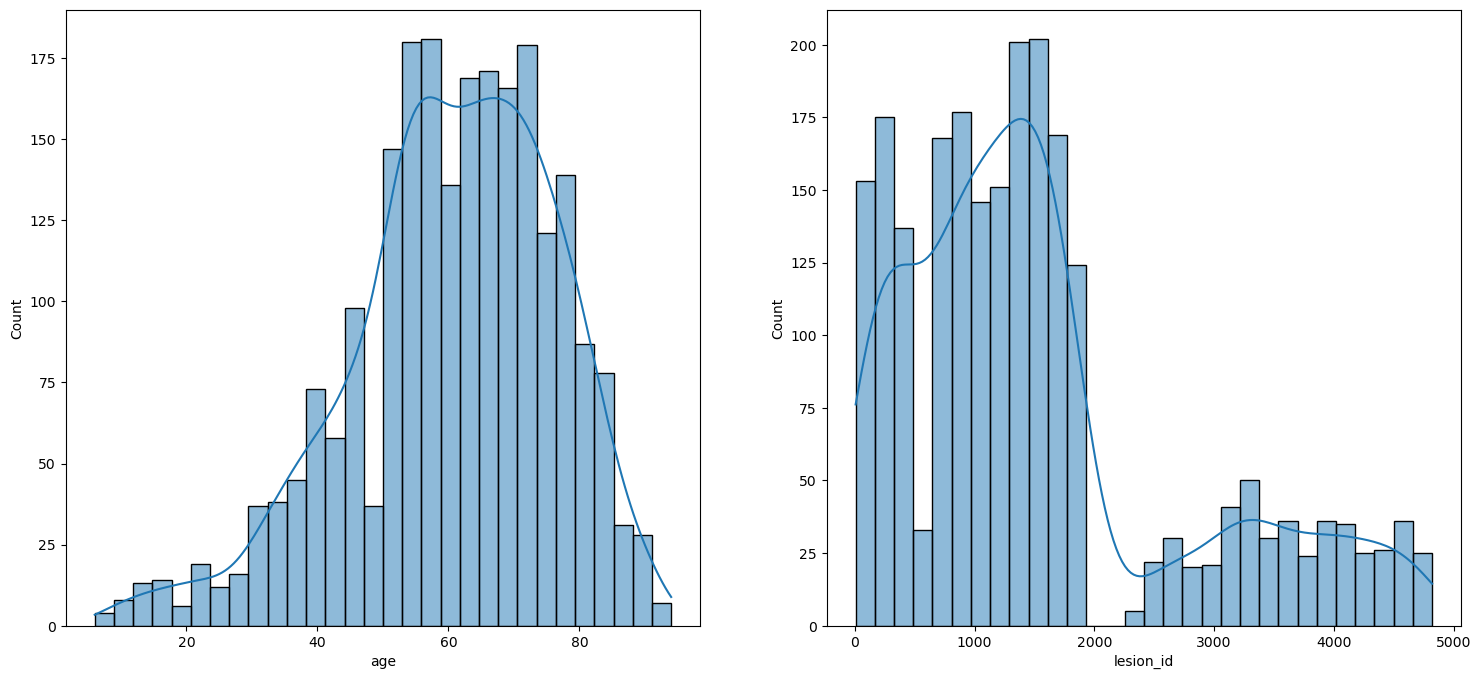

In [ ]:
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(1,2,1)
sns.histplot(data['age'],kde=True)

plt.subplot(1,2,2)
sns.histplot(data['lesion_id'],kde=True)

In [ ]:
data[continuous].skew()

lesion_id    1.097282
age         -0.615305
dtype: float64

<Axes: >

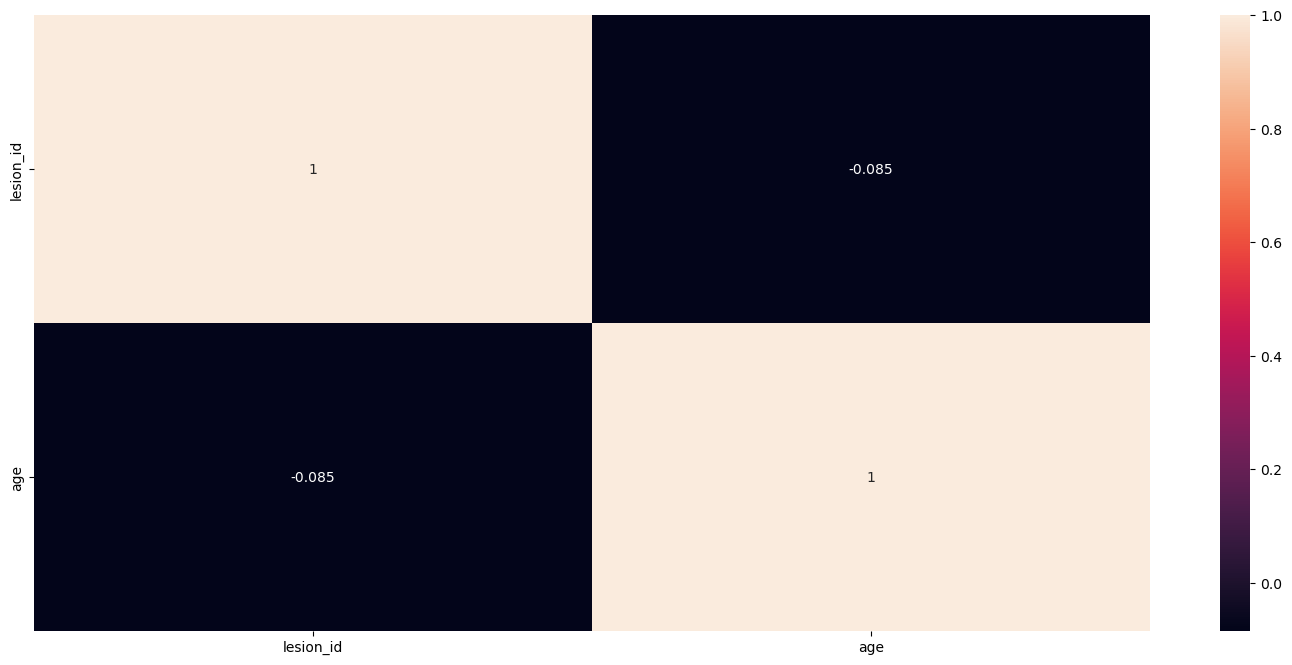

In [ ]:
sns.heatmap(data[continuous].corr(),annot=True)

In [ ]:
data[discrete_cat].describe()

,region,diagnostic,itch,grew,hurt,changed,bleed,elevation
count,2298,2298,2298,2298,2298,2298,2298,2298
unique,14,6,3,3,3,3,3,3
top,FACE,BCC,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
freq,570,845,1455,971,1891,1700,1678,1433


## Data Cleaning

In [ ]:
data.drop(['patient_id','lesion_id','smoke','drink','background_father',
          'background_mother','pesticide','gender','skin_cancer_history','cancer_history',
          'has_piped_water','has_sewage_system','fitspatrick','diameter_1',
          'diameter_2','img_id','biopsed'],axis=1,inplace=True)
data.head()

,age,region,diagnostic,itch,grew,hurt,changed,bleed,elevation
0,8,ARM,NEV,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1,55,NECK,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
2,77,FACE,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
3,75,HAND,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
4,79,FOREARM,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE


## Missing Values

In [ ]:
data.isnull().sum()

age           0
region        0
diagnostic    0
itch          0
grew          0
hurt          0
changed       0
bleed         0
elevation     0
dtype: int64

### Encoding

In [ ]:
data['region']=data['region'].map({'ARM':0,'NECK':1,'FACE':2,'HAND':3,'FOREARM':4,'CHEST':5,'NOSE':6,'THIGH':7,
                                   'SCALP':8,'EAR':9, 'BACK':10,'FOOT':11,'ABDOMEN':12,'LIP':13}).astype('int')
data['diagnostic']=data['diagnostic'].map({'NEV':0,'BCC':1,'ACK':2,'SEK':3,'SCC':4,'MEL':5}).astype('int')
data['itch']=data['itch'].map({'FALSE':0,'TRUE':1,'UNK':2}).astype('int')
data['grew']=data['grew'].map({'FALSE':0,'TRUE':1,'UNK':2}).astype('int')
data['hurt']=data['hurt'].map({'FALSE':0,'TRUE':1,'UNK':2}).astype('int')
data['changed']=data['changed'].map({'FALSE':0,'TRUE':1,'UNK':2}).astype('int')
data['bleed']=data['bleed'].map({'FALSE':0,'TRUE':1,'UNK':2}).astype('int')
data['elevation']=data['elevation'].map({'FALSE':0,'TRUE':1,'UNK':2}).astype('int')

In [ ]:
data.head()

,age,region,diagnostic,itch,grew,hurt,changed,bleed,elevation
0,8,0,0,0,0,0,0,0,0
1,55,1,1,1,1,0,1,1,1
2,77,2,2,1,0,0,0,0,0
3,75,3,2,1,0,0,0,0,0
4,79,4,1,1,1,0,0,1,1


### Data type conversion

In [ ]:
data['age']=data['age'].astype('int')

In [ ]:
X=data.drop('diagnostic',axis=1) #Train Data
y=data['diagnostic'] #Test Data

In [ ]:
print(set(y))

{0, 1, 2, 3, 4, 5}


### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(set(y_train))
y.value_counts()

{0, 1, 2, 3, 4, 5}


1    845
2    730
0    244
3    235
4    192
5     52
Name: diagnostic, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
target_names=['NEV','BCC','ACK','SEK','SCC','MEL']
print(classification_report(y_test,ypred_test, target_names=target_names))

              precision    recall  f1-score   support

         NEV       0.64      0.83      0.72        41
         BCC       0.80      0.78      0.79       188
         ACK       0.79      0.82      0.81       136
         SEK       0.66      0.59      0.62        46
         SCC       0.53      0.44      0.48        39
         MEL       0.70      0.70      0.70        10

    accuracy                           0.75       460
   macro avg       0.69      0.69      0.69       460
weighted avg       0.74      0.75      0.74       460



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[ 34,   3,   1,   2,   1,   0],
       [  6, 146,  16,  10,   9,   1],
       [  7,  13, 112,   2,   2,   0],
       [  4,   5,   7,  27,   2,   1],
       [  1,  16,   4,   0,  17,   1],
       [  1,   0,   1,   0,   1,   7]], dtype=int64)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)


In [ ]:
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()


In [ ]:
import os
import pandas as pd

data_dir = r"C:\Users\Mitta Aasish Kumar\Data Science Course\AIML Project\train_set"
image_files = [f for f in os.listdir(data_dir) if f.endswith('.png')]

features_list = []
for img_file in image_files:
    img_path = os.path.join(data_dir, img_file)
    features = extract_features(img_path)
    features_list.append(features)

features_df = pd.DataFrame(features_list)


1/1 [==============================] - 0s 156ms/step


KeyboardInterrupt: 

In [ ]:
os.listdir(data_dir)

In [ ]:
features_df.to_csv("image_features.csv", index=False)

In [ ]:
import os
import pandas as pd

data_dir = r"C:\Users\Mitta Aasish Kumar\Data Science Course\AIML Project\test_set"
image_files = [f for f in os.listdir(data_dir) if f.endswith('.png')]

features_list = []
for img_file in image_files:
    img_path = os.path.join(data_dir, img_file)
    features = extract_features(img_path)
    features_list.append(features)

features_df = pd.DataFrame(features_list)

In [ ]:
os.listdir(data_dir)

In [ ]:
features_df.to_csv("image_features_test.csv", index=False)

In [ ]:
df1=pd.read_csv("image_features_all.csv")
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,11.992150,0.000000,5.153082,24.643599,28.009308,0.0,0.000000,11.060067,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,14.683868,17.737180,0.000000,0.0,0.000000,11.789178,6.025297,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,6.137355,0.000000,0.000000,0.000000,0.0,10.833303,0.000000,0.000000,0.0
3,0.0,0.0,8.118018,0.0,1.179801,0.0,0.0,0.0,0.0,0.0,...,8.372901,0.000000,31.511848,11.137816,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,1.827268,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.568567,0.000000,2.470457,0.000000,4.048325,0.0,0.000000,0.000000,2.013259,0.0


In [ ]:
df2=data

In [ ]:
df1['output']=df2['diagnostic']
df1.to_csv("image_features.csv", index=False)


KeyboardInterrupt



In [ ]:
df1['output']

0       0
1       1
2       2
3       2
4       1
       ..
2293    2
2294    1
2295    3
2296    1
2297    3
Name: output, Length: 2298, dtype: int32

In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your dataframe where each column represents a feature and the output variable
# is in a column named 'output'

# Step 1: Compute the correlation matrix
correlation_matrix = df1.corr()

# Step 2: Rank the features based on their correlation with the output variable
correlation_with_output = correlation_matrix['output'].abs().sort_values(ascending=False)

# Step 3: Select the top 500 features
top_500_features = correlation_with_output.head(500).index.tolist()

# Now you have the top 500 features affecting the output variable

In [ ]:
top_500_features

['output',
 '21895',
 '3151',
 '12371',
 '13152',
 '19821',
 '2804',
 '15204',
 '16242',
 '16798',
 '8666',
 '18980',
 '9354',
 '6295',
 '19293',
 '21955',
 '13173',
 '13369',
 '13663',
 '14692',
 '9682',
 '8302',
 '17310',
 '19152',
 '15758',
 '12719',
 '6098',
 '12349',
 '17859',
 '402',
 '22407',
 '1607',
 '7835',
 '5014',
 '831',
 '16578',
 '3709',
 '20025',
 '16303',
 '13175',
 '5371',
 '4251',
 '22201',
 '20626',
 '21975',
 '12968',
 '11419',
 '12755',
 '23833',
 '16931',
 '8924',
 '15955',
 '22863',
 '18255',
 '14671',
 '2199',
 '16761',
 '1586',
 '19492',
 '12503',
 '19099',
 '19040',
 '9727',
 '16488',
 '12206',
 '6495',
 '11777',
 '9235',
 '9785',
 '11842',
 '21927',
 '21105',
 '16402',
 '11085',
 '16323',
 '793',
 '23382',
 '16693',
 '16947',
 '6350',
 '4221',
 '2639',
 '14705',
 '6585',
 '14387',
 '12658',
 '9962',
 '13863',
 '12718',
 '18450',
 '7720',
 '7070',
 '13513',
 '8035',
 '13238',
 '20240',
 '9197',
 '7400',
 '18781',
 '4580',
 '16274',
 '1892',
 '7463',
 '9805',


In [ ]:
df3=pd.DataFrame()

In [ ]:
for x in top_500_features:
    df3[x]=df1[x]

In [ ]:
df3.to_csv("top_features.csv", index=False)

In [ ]:
top=pd.read_csv("top_features.csv")
top.head()

,output,21895,3151,12371,13152,19821,2804,15204,16242,16798,...,4153,8107,6143,8347,3739,23320,1564,15855,19513,21714
0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,7.934182,...,0.0,0.000000,0.0,4.916677,8.113753,0.0,0.0,0.0,0.0,0.0
1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,3.264938,...,0.0,0.000000,0.0,7.377468,6.751903,0.0,0.0,0.0,0.0,0.0
2,2,5.070895,0.459487,0.0,0.0,0.0,0.0,0.000000,1.242484,6.018667,...,0.0,0.000000,0.0,6.394336,4.291248,0.0,0.0,0.0,0.0,0.0
3,2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,3.688568,0.0,6.446243,9.325717,0.0,0.0,0.0,0.0,0.0
4,1,0.000000,0.000000,0.0,0.0,0.0,0.0,8.025186,0.000000,0.000000,...,0.0,0.000000,0.0,10.961446,9.071072,0.0,0.0,0.0,0.0,0.0


## Modelling

In [ ]:
X=pd.get_dummies(top.drop("output",axis=1),drop_first=True)
y=top['output']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                 random_state=42)

## Pycaret

In [2]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3 MB/

In [ ]:
from pycaret.datasets import get_data

In [4]:
final=pd.read_csv("top_features.csv")
final.head()

,output,21895,3151,12371,13152,19821,2804,15204,16242,16798,...,4153,8107,6143,8347,3739,23320,1564,15855,19513,21714
0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,7.934182,...,0.0,0.000000,0.0,4.916677,8.113753,0.0,0.0,0.0,0.0,0.0
1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,3.264938,...,0.0,0.000000,0.0,7.377468,6.751903,0.0,0.0,0.0,0.0,0.0
2,2,5.070895,0.459487,0.0,0.0,0.0,0.0,0.000000,1.242484,6.018667,...,0.0,0.000000,0.0,6.394336,4.291248,0.0,0.0,0.0,0.0,0.0
3,2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,3.688568,0.0,6.446243,9.325717,0.0,0.0,0.0,0.0,0.0
4,1,0.000000,0.000000,0.0,0.0,0.0,0.0,8.025186,0.000000,0.000000,...,0.0,0.000000,0.0,10.961446,9.071072,0.0,0.0,0.0,0.0,0.0


In [3]:
from pycaret.classification import *

In [7]:
clf_setup = setup(data=final, target="output")

,Description,Value
0,Session id,4726
1,Target,output
2,Target type,Multiclass
3,Original data shape,"(2298, 500)"
4,Transformed data shape,"(2298, 500)"
5,Transformed train set shape,"(1608, 500)"
6,Transformed test set shape,"(690, 500)"
7,Numeric features,499
8,Preprocess,True
9,Imputation type,simple


In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.3675,0.5000,0.3675,0.1351,0.1976,0.0000,0.0000,0.1580
rf,Random Forest Classifier,0.3626,0.5311,0.3626,0.2435,0.2863,0.0187,0.0213,1.3580
qda,Quadratic Discriminant Analysis,0.3570,0.0000,0.3570,0.1506,0.2021,0.0046,0.0097,0.4200
et,Extra Trees Classifier,0.3539,0.5459,0.3539,0.2652,0.2832,0.0096,0.0105,1.4220
gbc,Gradient Boosting Classifier,0.3514,0.0000,0.3514,0.3163,0.3134,0.0445,0.0465,27.5710
lightgbm,Light Gradient Boosting Machine,0.3377,0.5284,0.3377,0.2637,0.2798,-0.0035,-0.0037,56.9130
xgboost,Extreme Gradient Boosting,0.3327,0.5198,0.3327,0.2688,0.2809,-0.0036,-0.0037,13.3450
ada,Ada Boost Classifier,0.3321,0.0000,0.3321,0.2723,0.2705,-0.0072,-0.0081,1.0590
ridge,Ridge Classifier,0.3234,0.0000,0.3234,0.2883,0.3012,0.0332,0.0334,0.1760
lda,Linear Discriminant Analysis,0.3197,0.0000,0.3197,0.3120,0.3129,0.0616,0.0618,0.4010


Processing:   0%|          | 0/65 [00:00<?, ?it/s]